In [3]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [4]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'PE&OLES.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [5]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,251.309998,234.550003,234.550003,249.559998,287708.0,240.693558
2019-03-21,255.000000,246.389999,249.100006,253.589996,216214.0,244.580383
2019-03-22,253.899994,240.050003,253.899994,244.899994,186102.0,236.199112
2019-03-25,250.000000,242.830002,245.000000,249.490005,92684.0,240.626053
2019-03-26,250.039993,242.050003,248.770004,242.529999,191008.0,233.913330


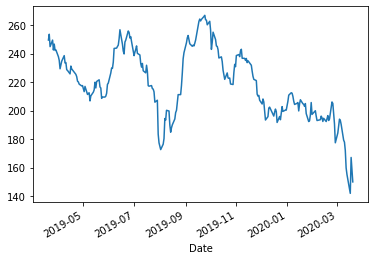

In [6]:
%matplotlib inline
data.Close.plot()

In [7]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [8]:
df = BBANDS(data,20)

In [9]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

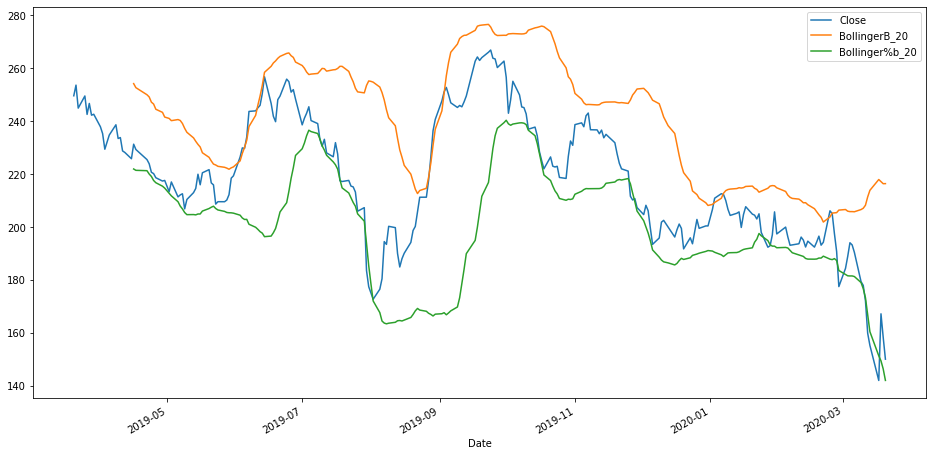

In [10]:
df2.plot(figsize = (16,8))

In [11]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,249.559998,Sin informacion,-
2019-03-21,253.589996,Sin informacion,-
2019-03-22,244.899994,Sin informacion,-
2019-03-25,249.490005,Sin informacion,-
2019-03-26,242.529999,Sin informacion,-
2019-03-27,246.669998,Sin informacion,-
2019-03-28,242.229996,Sin informacion,-
2019-03-29,242.580002,Sin informacion,-
2019-04-01,237.869995,Sin informacion,-
